## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [1]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE\ 519\ fall\ 2021/HW3

[WinError 3] The system cannot find the path specified: 'drive/MyDrive/CSE\\ 519\\ fall\\ 2021/HW3'
C:\Users\yanli\Downloads


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

ModuleNotFoundError: No module named 'google'

In [5]:
%cp kaggle.json /root/.kaggle/

UsageError: Line magic function `%cp` not found.


In [6]:
!kaggle competitions download -c  rossmann-store-sales

Traceback (most recent call last):
  File "c:\users\yanli\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\yanli\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\yanli\anaconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "c:\users\yanli\anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "c:\users\yanli\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\yanli\.kaggle. Or use the environment method.


In [7]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 50B1-AB6E

 Directory of C:\Users\yanli\Downloads

10/11/2021  11:16 AM    <DIR>          .
10/11/2021  11:16 AM    <DIR>          ..
10/02/2021  01:41 PM    <DIR>          .ipynb_checkpoints
10/06/2021  12:14 PM            32,387 AMS-511 110681412 Assignment 05.nb
10/06/2021  12:12 PM            27,192 ams-511-04-ha-00.nb
10/06/2021  08:55 AM           340,289 ams-511-05-cn-00.nb
10/06/2021  12:42 PM         2,883,116 ams-511-05-ha-00.nb
10/06/2021  12:16 PM            77,259 ams-511-05-hs-00 (1).nb
10/05/2021  09:34 PM            77,383 ams-511-05-hs-00.nb
10/06/2021  08:51 AM         1,178,586 ams-511-06-cn-00.nb
10/06/2021  10:53 AM         2,849,672 ams-511-06-ha-00.nb
10/05/2021  09:34 PM            76,054 ams-511-06-hs-00.nb
10/04/2021  09:54 AM           399,124 AMS586_HW4_Problems.docx.pdf
10/02/2021  02:24 PM             1,257 df.png
12/11/2019  04:57 AM           317,611 sample_submission.csv
12/11/2019  04:57 AM            4

## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [1]:
#fill in dtypes dict for efficient memory utilization
dtypes = {}

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats.stats import pearsonr
from scipy import stats

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [4]:
import pandas as pd
data_train = pd.read_csv("C:/Users/yanli/OneDrive/桌面/学校/CSE519/HW3/train.csv")
data_store = pd.read_csv("C:/Users/yanli/OneDrive/桌面/学校/CSE519/HW3/store.csv")
data_test = pd.read_csv("C:/Users/yanli/OneDrive/桌面/学校/CSE519/HW3/test.csv")
data_sample = pd.read_csv("C:/Users/yanli/OneDrive/桌面/学校/CSE519/HW3/sample_submission.csv")

C:\Users\yanli\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
merged = data_train.merge(data_store, on='Store')
merged.to_csv("C:/Users/yanli/OneDrive/桌面/merged.csv", index = False)
merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


#### I used the merge function to merge train.csv and store.csv together by the key value - "Store"

## **Section 2: Effect of Holidays (Q2)**

In [6]:
#For this question, I decide to use data of 1 year. This is because data of 1 year is big enough and contains all kinds of holidays.
data_1Year_map = merged['Date'] <= "2013-12-31"
data_1Year = merged[data_1Year_map]
SalesPerDay_initial = data_1Year.groupby('Date').sum()
SalesPerDay_initial1 = SalesPerDay_initial.reset_index()
SalesPerDay_initial_Final = SalesPerDay_initial1[['Date','Sales']]
SPD = SalesPerDay_initial_Final.set_index('Date')
SPD

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2013-12-27,8168568
2013-12-28,6726568
2013-12-29,226553


In [7]:
#In this step, I will extract all rows with stateholiday mark.
#Firstly I extract all rows with StateHoliday 'a'. All these rows contains total sales data of one day. 
data_1Year.reset_index(drop=True)
StateHoliday_a_map = data_1Year['StateHoliday'].apply(lambda x: x == 'a')
StateHoliday_a = data_1Year[StateHoliday_a_map]
StateHoliday_a.groupby('Date').sum().reset_index()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,2013-01-01,621182,2228,97235,19491,17,0,1114,6010220.0,5487.0,1526585.0,571,13473.0,1148717.0
1,2013-01-06,169291,2163,9954,2470,2,0,0,1828270.0,1577.0,425616.0,231,5936.0,464737.0
2,2013-05-01,622170,3345,200972,34845,18,1115,0,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0
3,2013-05-09,622170,4460,233215,41089,30,0,28,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0
4,2013-05-20,622170,1115,253936,44288,33,0,75,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0
5,2013-05-30,434053,3064,685181,82331,85,766,253,3608420.0,3429.0,953734.0,481,11698.0,967669.0
6,2013-08-15,98062,720,194064,19627,26,180,180,828640.0,910.0,251003.0,156,4584.0,313865.0
7,2013-10-03,622170,4460,285518,48103,40,0,120,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0
8,2013-10-31,97317,668,12318,2039,3,0,111,1546390.0,1011.0,261031.0,74,1333.0,148842.0
9,2013-11-01,323286,2895,80015,16386,7,0,286,2458770.0,2572.0,718720.0,390,9792.0,784638.0


In [8]:
#Secondly, I extract all rows with StateHoliday 'b'
StateHoliday_b_map = data_1Year['StateHoliday'].apply(lambda x: x == 'b')
StateHoliday_b = data_1Year[StateHoliday_b_map]
StateHoliday_b.groupby('Date').sum().reset_index()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,2013-03-29,622170,5575,213921,35775,16,1115,1087,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0
1,2013-04-01,622170,1115,241076,41594,31,0,1031,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0


In [9]:
#Thirdly, I extract all rows with StateHoliday 'c'
StateHoliday_c_map = data_1Year['StateHoliday'].apply(lambda x: x == 'c')
StateHoliday_c = data_1Year[StateHoliday_c_map]
StateHoliday_c.groupby('Date').sum().reset_index()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,2013-12-25,622170,3345,142585,24022,17,0,1115,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0
1,2013-12-26,622170,4460,188597,30762,19,0,1115,6010250.0,5498.0,1528597.0,571,13473.0,1148717.0


In [10]:
#Since I have known all rows that contain Stateholidays, I can make a dataframe which has data of sales of StateHolidays and data of 
#sales of three days before StateHolidays. 
Q2_result = SPD.loc[['2013-01-01','2013-01-02','2013-01-03','2013-01-04','2013-01-05','2013-01-06'
                     ,'2013-03-26','2013-03-27','2013-03-28','2013-03-29','2013-03-30','2013-03-31','2013-04-01'
                     ,'2013-04-28','2013-04-29','2013-04-30','2013-05-01'
                     ,'2013-05-06','2013-05-07','2013-05-08','2013-05-09'
                    ,'2013-05-17','2013-05-18','2013-05-19','2013-05-20'
                    ,'2013-05-27','2013-05-28','2013-05-29','2013-05-30'
                    ,'2013-08-12','2013-08-13','2013-08-14','2013-08-15'
                    ,'2013-09-30','2013-10-01','2013-10-02','2013-10-03'
                    ,'2013-10-28','2013-10-29','2013-10-30','2013-10-31'
                    ,'2013-11-01'
                    ,'2013-11-17','2013-11-18','2013-11-19','2013-11-20'
                    ,'2013-12-22','2013-12-23','2013-12-24','2013-12-25','2013-12-26']]
#Q2_result1 = Q2_result.reset_index()
#Q2_result1

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

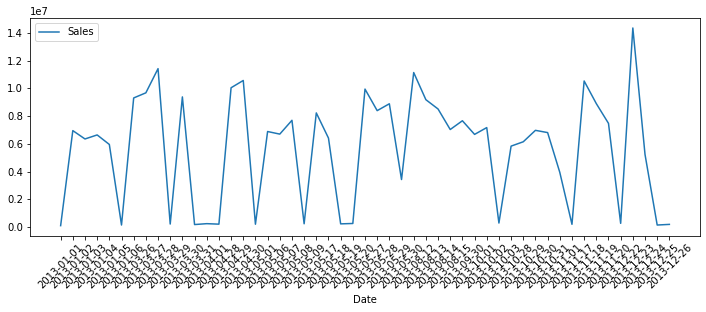

In [11]:
#Now we can make the line plot to see do people shop more or less during the holidays or before the holidays
plt.figure(figsize = (12,4))
result_plt = sns.lineplot(data = Q2_result)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

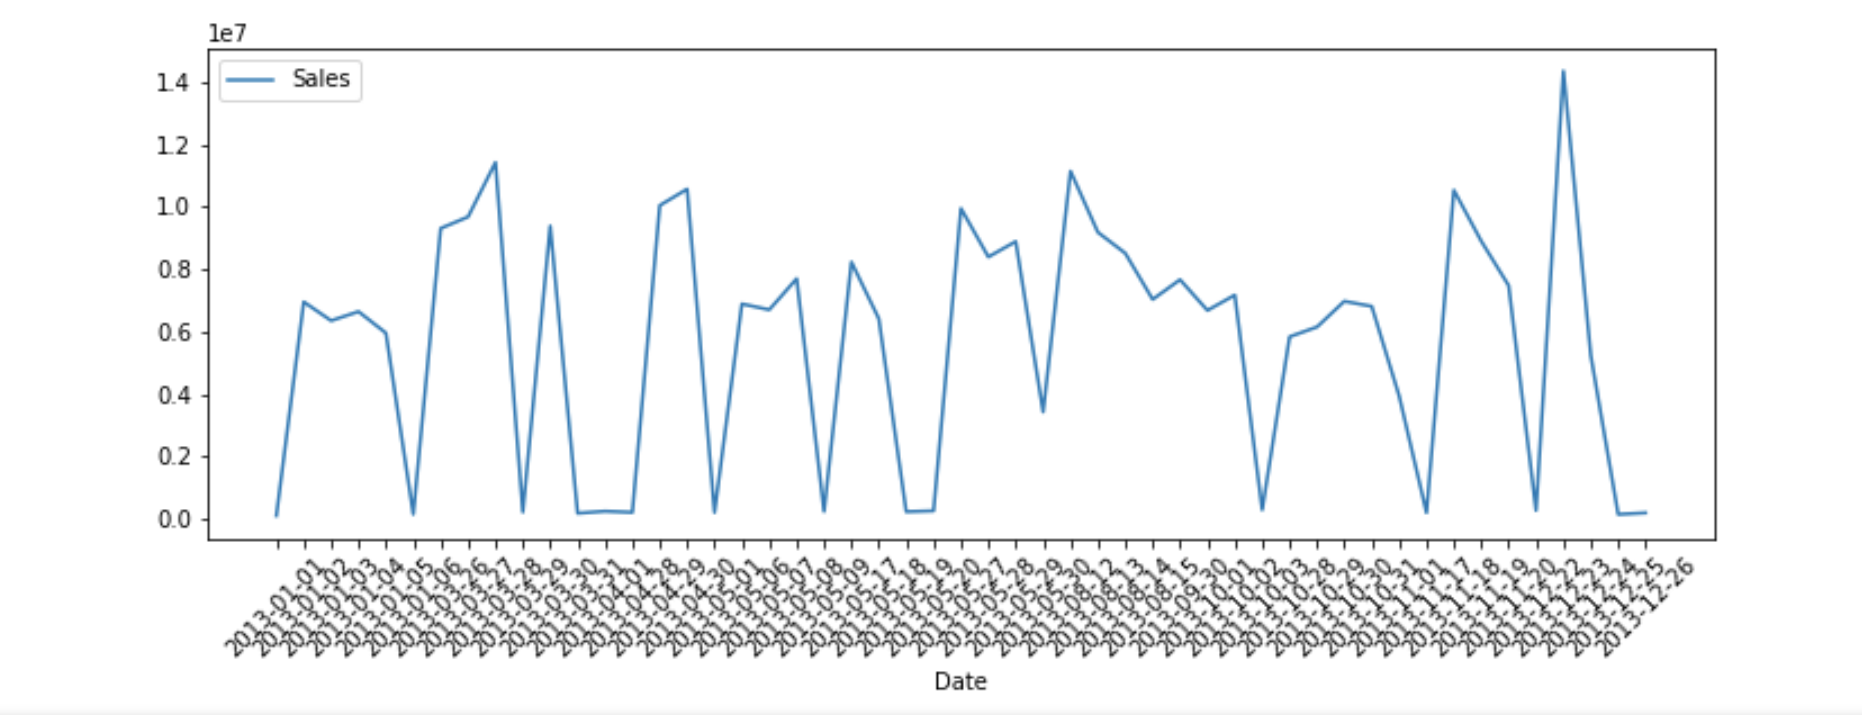

#### As we can see from the line-plot and dataframe above, sales have a decreasing trend during the holidays, which means that people shop less during the holidays. Alse we can see that StateHolidays-b has the strongest effect on sales, StateHolidays-c has the second strongest effect, and StateHolidays-a has the weakest effect. 

## **Section 3: Most and Least selling stores (Q3a & Q3b)**

## *Q3a*

In [12]:
data_7months_map = merged['Date']>="2015-01-01"
data_7months = merged[data_7months_map]

In [13]:
data_StoreDateSales = data_7months[['Store','Sales']].groupby(['Store']).sum()
data_StoreDateSales.sort_values(by='Sales', ascending=True)

,Sales
Store,
307,469499
841,479062
543,482720
198,494477
208,530518
...,...
842,3476494
817,3558419
1114,3809075


#### From the figure above, we can see that the five stores with the highest cumulative sales in 7 months are: 842, 817, 562, 1114, 262
#### The five stores with the least cumulative sales in 7 months are: 841, 208, 198, 543, 307

In [14]:
#In this step, I use the 'apply' function to take out rows with sepcific value of store name, which are 307, 543, 198, 208, 841
data307 = data_7months[['Store','Sales']]
St307_map = data307['Store'].apply(lambda x: x == 307)
St307 = data307[St307_map].Sales
data543 = data_7months[['Store','Sales']]
St543_map = data543['Store'].apply(lambda x: x == 543)
St543 = data543[St543_map].Sales
data198 = data_7months[['Store','Sales']]
St198_map = data198['Store'].apply(lambda x: x == 198)
St198 = data198[St198_map].Sales
data208 = data_7months[['Store','Sales']]
St208_map = data208['Store'].apply(lambda x: x == 208)
St208 = data208[St208_map].Sales
data841 = data_7months[['Store','Sales']]
St841_map = data841['Store'].apply(lambda x: x == 841)
St841 = data841[St841_map].Sales

In [15]:
#In this step, I devide the sum of store-sales into groups of 7 days; therefore, we can get the plot of sales per week in the next step.
Store307_WklySale = St307.groupby(St307.index // 7).sum()
Store307_WklySale = Store307_WklySale.reset_index(drop=True)
Store543_WklySale = St543.groupby(St543.index // 7).sum()
Store543_WklySale = Store543_WklySale.reset_index(drop=True)
Store198_WklySale = St198.groupby(St198.index // 7).sum()
Store198_WklySale = Store198_WklySale.reset_index(drop=True)
Store208_WklySale = St208.groupby(St208.index // 7).sum()
Store208_WklySale = Store208_WklySale.reset_index(drop=True)
Store841_WklySale = St841.groupby(St841.index // 7).sum()
Store841_WklySale = Store841_WklySale.reset_index(drop=True)

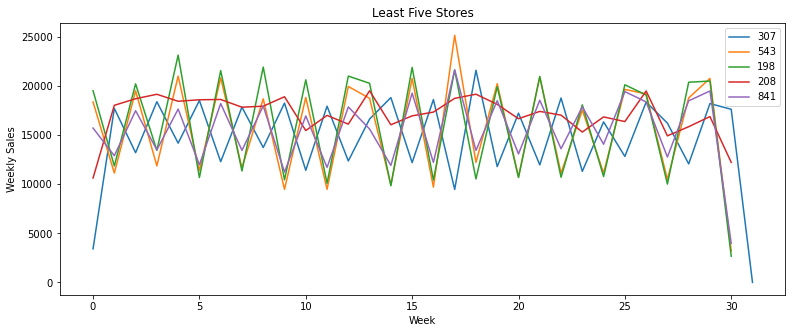

In [16]:
#In this step, the line-plot shows the sales per week over time for these five least sales stores. 
#The X-axis denotes Weeks, and the Y-axis denotes the Weekly Sales. 
plt.figure(figsize = (13,5))
plt.plot(Store307_WklySale)
plt.plot(Store543_WklySale)
plt.plot(Store198_WklySale)
plt.plot(Store208_WklySale)
plt.plot(Store841_WklySale)
plt.legend(['307','543','198','208','841'])
plt.title('Least Five Stores')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

#### Now let's make plot for five stores with largest cumilative sales. 

In [17]:
#In this step, I use 'apply' function to take out rows with sepcific value of store name, which are 842, 817, 562, 1114, 262.
data262 = data_7months[['Store','Sales']]
St262_map = data262['Store'].apply(lambda x: x == 262)
St262 = data262[St262_map].Sales
data817 = data_7months[['Store','Sales']]
St817_map = data817['Store'].apply(lambda x: x == 817)
St817 = data817[St817_map].Sales
data562 = data_7months[['Store','Sales']]
St562_map = data562['Store'].apply(lambda x: x == 562)
St562 = data562[St562_map].Sales
data1114 = data_7months[['Store','Sales']]
St1114_map = data1114['Store'].apply(lambda x: x == 1114)
St1114 = data1114[St1114_map].Sales
data842 = data_7months[['Store','Sales']]
St842_map = data842['Store'].apply(lambda x: x == 842)
St842 = data842[St842_map].Sales

In [18]:
#In this step, I devide the sum of store-sales into groups of 7 days; therefore, we can get the plot of sales per week in the next step.
Store262_WklySale = St262.groupby(St262.index // 7).sum()
Store262_WklySale = Store262_WklySale.reset_index(drop=True)
Store817_WklySale = St817.groupby(St817.index // 7).sum()
Store817_WklySale = Store817_WklySale.reset_index(drop=True)
Store562_WklySale = St562.groupby(St562.index // 7).sum()
Store562_WklySale = Store562_WklySale.reset_index(drop=True)
Store1114_WklySale = St1114.groupby(St1114.index // 7).sum()
Store1114_WklySale = Store1114_WklySale.reset_index(drop=True)
Store842_WklySale = St842.groupby(St842.index // 7).sum()
Store842_WklySale = Store842_WklySale.reset_index(drop=True)

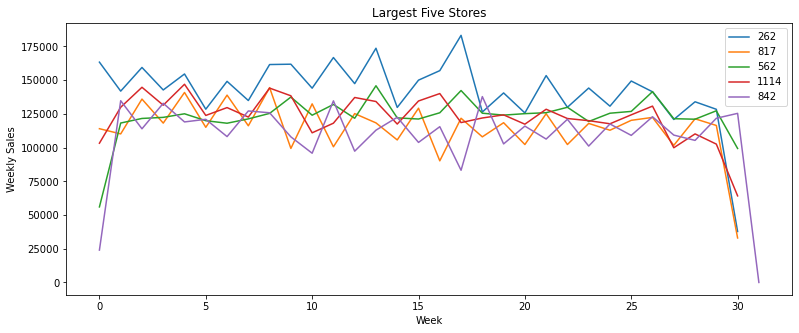

In [19]:
#In this step, the line-plot shows the sales per week over time for these five largest sales stores. 
#The X-axis denotes Weeks, and the Y-axis denotes the Weekly Sales. 
plt.figure(figsize = (13,5))
plt.plot(Store262_WklySale)
plt.plot(Store817_WklySale)
plt.plot(Store562_WklySale)
plt.plot(Store1114_WklySale)
plt.plot(Store842_WklySale)
plt.legend(['262','817','562','1114','842'])
plt.title('Largest Five Stores')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

## *Q3b*

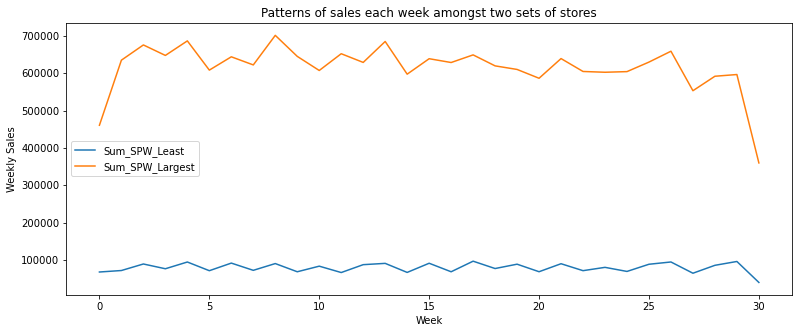

In [20]:
#In this question, I will use line-plots to reveal the similarity of patterns of sales each week amongst these two sets of stores
#Firstly, I will make the data for sum of sales per week of the five stores with the least cumulative sales in 7 months
Sum_SPW_Least = Store307_WklySale + Store543_WklySale + Store198_WklySale + Store208_WklySale + Store841_WklySale

#Secondly, I will make the data for sum of sales per week of the five stores with the largest cumulative sales in 7 months
Sum_SPW_Largest = Store262_WklySale + Store817_WklySale + Store562_WklySale + Store1114_WklySale + Store842_WklySale

#Finally, let's make a line-plot to see the patterns
plt.figure(figsize = (13,5))
plt.plot(Sum_SPW_Least)
plt.plot(Sum_SPW_Largest)
plt.legend(['Sum_SPW_Least','Sum_SPW_Largest'])
plt.title('Patterns of sales each week amongst two sets of stores')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

#### From the line-plot above, we can see that the patterns of sales of these two sets of stores are not exactly the same. The trend of set of largest sales stores has frequent and huge increse and decrese. However, set of least sales stores has a stable trend. 

## **Section 4: Closest Competitor: Distance and Age (Q4)**

In [21]:
#For this question, I will use data of 7 months to make sure the result is accurate
#Firstly, I will devide stores into two groups: Stores with long CompetitionDistance and Stores with short CompetitionDistance
#To acheive this goal, my approach is to find the mean of CompetitionDistance, and I will use this mean to devide stores. 

CompetitionDistance_Mean = data_7months['CompetitionDistance'].mean()

LongStore_map = data_7months['CompetitionDistance'] > CompetitionDistance_Mean
ShortStore_map = data_7months['CompetitionDistance'] < CompetitionDistance_Mean

LongStore = data_7months[LongStore_map]
ShortStore = data_7months[ShortStore_map]

#Since two groups are successfullt made, let's generate their total sales per week.
LongSum = LongStore.groupby('Date').sum()
ShortSum = ShortStore.groupby('Date').sum()

LongSum_Sales = LongSum.reset_index().Sales
ShortSum_Sales = ShortSum.reset_index().Sales

LongStore_WklySale = LongSum_Sales.groupby(LongSum_Sales.index // 7).sum()
LongStore_WklySale = LongStore_WklySale.reset_index(drop=True)
ShortStore_WklySale = ShortSum_Sales.groupby(ShortSum_Sales.index // 7).sum()
ShortStore_WklySale = ShortStore_WklySale.reset_index(drop=True)

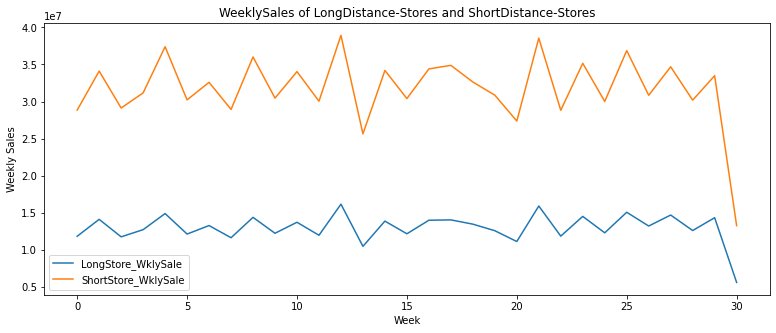

In [22]:
#Since two sets of WklySales are generated, let's make a line-plot to visualize it. 
plt.figure(figsize = (13,5))
plt.plot(LongStore_WklySale)
plt.plot(ShortStore_WklySale)
plt.legend(['LongStore_WklySale','ShortStore_WklySale'])
plt.title('WeeklySales of LongDistance-Stores and ShortDistance-Stores')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\yanli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

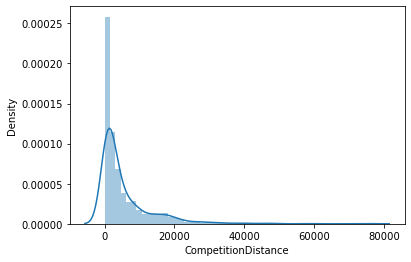

In [23]:
#To reveal the relationship between Weekly-Sales and CompetitionDistance, I also need a histogram of CompetitionDistance. 

ComDistance = data_7months.groupby('Store').sum()
ComDistance['CompetitionDistance'] = ComDistance['CompetitionDistance'].div(212)
sns.distplot(a=ComDistance['CompetitionDistance'], kde=True)

In [24]:
CompetitionDistance_Mean

5404.901079136691

#### From the line-plot and histogram above, we can see that the stores farther to competitors do not have a better sale per week than the closer ones. The reason, I think, is that the number of stores that are far to competitors are less than the close ones; Therefore, the total weekly sales of them are less than stores that are close to competitors. 

## **Section 5: Pearson Correlation of Features (Q5)**

#### In this section, I will use ten faeatures which are: 'Date', 'Sales', 'Customers', 'CompetitionDistance', 'Promo'

In [25]:
Features = merged[[ 'Date', 'Sales', 'Customers', 'CompetitionDistance', 'Promo']]

In [26]:
corr = Features.corr()
corr

,Sales,Customers,CompetitionDistance,Promo
Sales,1.000000,0.894711,-0.019229,0.452345
Customers,0.894711,1.000000,-0.102861,0.316169
CompetitionDistance,-0.019229,-0.102861,1.000000,0.000138
Promo,0.452345,0.316169,0.000138,1.000000


#### In the step above, I used the corr() function to calculate the Pearson Correlation between those five features

<AxesSubplot:>

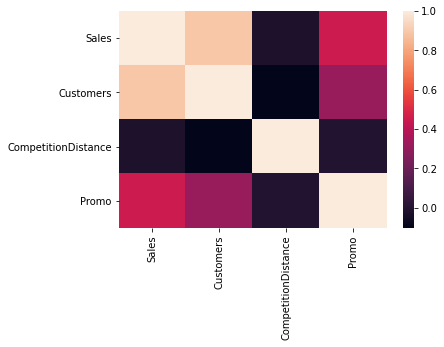

In [27]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

#### In the step above, I used heatmap to visualize the Pearson Correlation between all pairs of these variables. From the heatmap, we can see that the strongest correlation is between 'Customers' and 'Sales'. The second strong correlation is between 'Promo' and 'Sales'

In [28]:
corr_Spearman = Features.corr(method = "spearman")
corr_Spearman

,Sales,Customers,CompetitionDistance,Promo
Sales,1.000000,0.903353,-2.423468e-02,4.895654e-01
Customers,0.903353,1.000000,-1.772956e-01,3.772571e-01
CompetitionDistance,-0.024235,-0.177296,1.000000e+00,-7.807418e-07
Promo,0.489565,0.377257,-7.807418e-07,1.000000e+00


<AxesSubplot:>

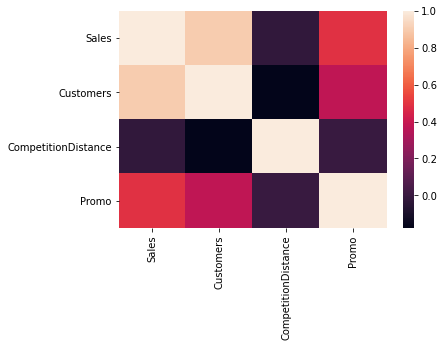

In [29]:
sns.heatmap(corr_Spearman)

#### After using Spearman Correlation to analyze those ten features, I find out that the results have no big difference. The strongest correlation is still between Sales and Customers. The second strong correlation is still between Sales and Promo. 

## **Section 6: Permutation Testing (Q6)**

### In this question, I will use 'Customers' as one likely good, 'CompetitionDistance' as one presumably meaningless

### Part 1. Sales and Customers (One likely good)

In [30]:
# Take Sales and Customers data out and remove all rows with 0 in it. 
variable_SC = merged[['Sales', 'Customers']][np.all(merged[['Sales', 'Customers']]!=0, axis = 1)]

In [31]:
#Split the data into 80:20
c = variable_SC.Customers
C = np.array(c).reshape(-1, 1)
sales = variable_SC.Sales
C_train, C_test, S_train, S_test = train_test_split(C, sales, train_size = 0.8, test_size = 0.2, random_state = 100)

In [32]:
#Building the simple linear regression model and calculate root-mean-squared error
lm = LinearRegression()
lm.fit(C_train, S_train)
S_test_pred = lm.predict(C_test)
RootMeanErr = np.sqrt(metrics.mean_squared_error(np.log(S_test), np.log(S_test_pred)))
RootMeanErr

0.24155441458016685

In [33]:
# I will do the permutation test in this block. A loop of 200 times will be excuted to simulate the 200 times permutation test. 
RootMeanErr1 = []
for i in range(200):
    Sales = np.array(sales)
    Sales1 = np.random.permutation(Sales)
    
    C1_train, C1_test, S1_train, S1_test = train_test_split(C, Sales1, train_size = 0.8, test_size = 0.2, random_state = 100)
    
    LM = LinearRegression()
    LM.fit(C1_train, S1_train)
    S_test_pred = LM.predict(C1_test)
    RootMeanErr_1 = np.sqrt(metrics.mean_squared_error(np.log(S1_test), np.log(S_test_pred)))
    RootMeanErr1.append(RootMeanErr_1)

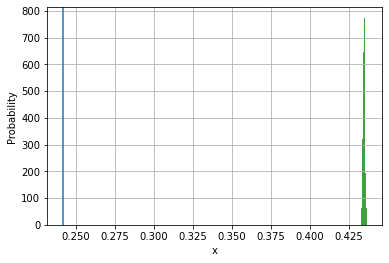

In [34]:
#Make plot to ensure that the result is correct
plt.hist(RootMeanErr1, 50, density = True, facecolor = 'g', alpha = 0.75)
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.axvline(x = RootMeanErr)
plt.show()

In [35]:
#Calculating the p-value
((RootMeanErr1 < RootMeanErr).sum()+1)/201

0.004975124378109453

### Part 2. Sales and CompetitionDistance (One presumably meaningless)

In [36]:
# Take Sales and CompetitionDistance data out and remove all rows with 0 in it. 
variable_SCom = merged[['Sales', 'CompetitionDistance']][np.all(merged[['Sales', 'CompetitionDistance']]!=0, axis = 1)]

In [37]:
#Since the variable 'CompetitionDistance' contains NaN, I will replace them with mean. 
mean_value = variable_SCom.CompetitionDistance.mean()
l = variable_SCom.CompetitionDistance.fillna(value = mean_value)

In [38]:
#Split the data into 80:20
com = l
Com = np.array(com).reshape(-1, 1)
sales = variable_SC.Sales
Com_train, Com_test, S_train, S_test = train_test_split(Com, sales, train_size = 0.8, test_size = 0.2, random_state = 100)

In [39]:
lm.fit(Com_train, S_train)
S_test_pred_SCom = lm.predict(Com_test)
RootMeanErr_SCom = np.sqrt(metrics.mean_squared_error(np.log(S_test), np.log(S_test_pred_SCom)))
RootMeanErr_SCom

0.4344767679935631

In [40]:
# I will do the permutation test in this block. A loop of 200 times will be excuted to simulate the 200 times permutation test. 
RootMeanErr_SCom1 = []
for i in range(200):
    Sales_SCom = np.array(sales)
    Sales_SCom1 = np.random.permutation(Sales)
    
    C2_train, C2_test, S2_train, S2_test = train_test_split(Com, Sales_SCom1, train_size = 0.8, test_size = 0.2, random_state = 100)
    
    LM_SCom = LinearRegression()
    LM_SCom.fit(C2_train, S2_train)
    S_test_pred_SCom = LM_SCom.predict(C2_test)
    RootMeanErr_SCom_1 = np.sqrt(metrics.mean_squared_error(np.log(S2_test), np.log(S_test_pred_SCom)))
    RootMeanErr_SCom1.append(RootMeanErr_SCom_1)

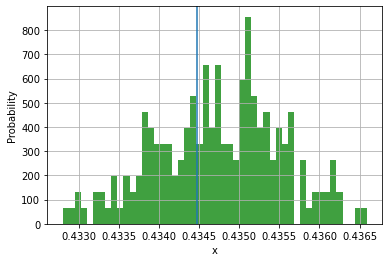

In [41]:
#Make plot to ensure that the result is correct
plt.hist(RootMeanErr_SCom1, 50, density = True, facecolor = 'g', alpha = 0.75)
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.axvline(x = RootMeanErr_SCom)
plt.show()

In [43]:
#Calculating the p-value
((RootMeanErr_SCom_1 < RootMeanErr_SCom).sum()+1)/201

0.004975124378109453

### Part 3. Sales and Promo (One at random)

In [44]:
# Take Sales and Store data out and remove all rows with 0 in it. 
variable_SStore = merged[['Sales', 'Store']][np.all(merged[['Sales', 'Store']]!=0, axis = 1)]

In [45]:
#Split the data into 80:20
store = variable_SStore.Store
Store = np.array(store).reshape(-1, 1)
sales = variable_SC.Sales
Store_train, Store_test, Sales_train, Sales_test = train_test_split(Store, sales, train_size = 0.8, test_size = 0.2, random_state = 100)

In [46]:
lm.fit(Store_train, Sales_train)
S_test_pred_SStore = lm.predict(Store_test)
RootMeanErr_SStore = np.sqrt(metrics.mean_squared_error(np.log(Sales_test), np.log(S_test_pred_SStore)))
RootMeanErr_SStore

0.43473244425406116

In [47]:
# I will do the permutation test in this block. A loop of 200 times will be excuted to simulate the 200 times permutation test. 
RootMeanErr_SStore1 = []
for i in range(200):
    Sales_SStore = np.array(sales)
    Sales_SStore1 = np.random.permutation(Sales_SStore)
    
    Store1_train, Store1_test, Sales2_train, Sales2_test = train_test_split(Store, Sales_SStore1, train_size = 0.8, test_size = 0.2, random_state = 100)
    
    LM_SStore = LinearRegression()
    LM_SStore.fit(Store1_train, Sales2_train)
    S_test_pred_SStore = LM_SStore.predict(Store1_test)
    RootMeanErr_SStore_1 = np.sqrt(metrics.mean_squared_error(np.log(Sales2_test), np.log(S_test_pred_SStore)))
    RootMeanErr_SStore1.append(RootMeanErr_SStore_1)

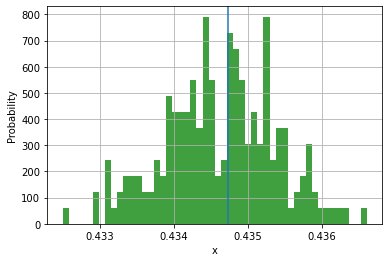

In [48]:
#Make plot to ensure that the result is correct
plt.hist(RootMeanErr_SStore1, 50, density = True, facecolor = 'g', alpha = 0.75)
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.axvline(x = RootMeanErr_SStore)
plt.show()

In [49]:
#Calculating the p-value
((RootMeanErr_SStore_1 < RootMeanErr_SStore).sum()+1)/201

0.004975124378109453

## **Section 7: Interesting findings (Q7)**

### Part 1. Trending of sales for the largest sell store against the promo from 05-01-2015 to 07-31-2015

#### In this Part, I will pick the largest sell store as my sample and analyze the correlation between its sales and promo. In the result, I will try to see that will promo have effect on the sales or not. All data will be analyzed as weekly data. 

In [50]:
#As the first step, I need to find out which store has the largest sales from 05-01-2015 to 07-31-2015
data_3months_map = merged['Date']>="2015-05-01"
data_3months = merged[data_3months_map]
data_3months = data_3months.dropna()
data_LargesSales = data_3months[['Store','Sales']].groupby(['Store']).sum()
data_LargesSales.sort_values(by='Sales', ascending=True)
#As we can see, Store-380 has the largest sale in 3 months.

,Sales
Store,
198,217474
970,224099
210,239925
956,243733
254,248074
...,...
1092,944411
1027,993956
192,999619


In [51]:
#Calculate the weekly sales
data380 = data_3months[['Store','Sales']]
St380_map = data380['Store'].apply(lambda x: x == 380)
St380 = data380[St380_map].Sales
Store380_WklySale = St380.groupby(St380.index // 7).sum()
Store380_WklySale = Store380_WklySale.reset_index(drop=True)

In [52]:
#Then we can start generating the trend of promo. Since the promo dataset is combined with 0 and 1. Therefore, I will add the daily
#promo data together and split them into weekly data. As the result, we can see that how promo affects the trend of sales on Store-380.
#I will use the same 
data380_Promo = data_3months[['Store','Promo']]
St380_Promo_map = data380_Promo['Store'].apply(lambda x: x == 380)
St380_Promo = data380_Promo[St380_Promo_map].Promo
Store380_WklyPromo = St380_Promo.groupby(St380_Promo.index // 7).sum()
Store380_WklyPromo = Store380_WklyPromo.reset_index(drop=True)

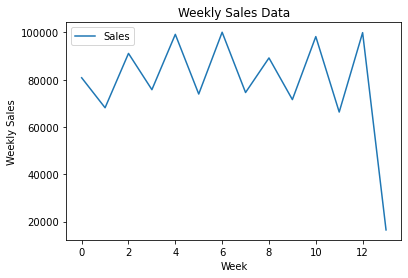

In [53]:
#In the last two step, we got the weekly sales data and weekly promo data of Store-380 in 3 months. Now it's time to make plots of these
#two variables and see how promo affects sales on Store-380.
plt.plot(Store380_WklySale)
plt.legend(['Sales'])
plt.title('Weekly Sales Data')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

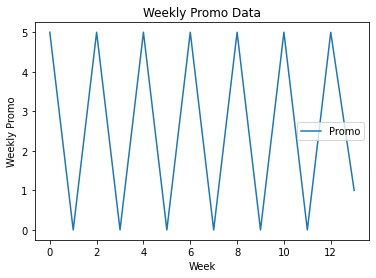

In [54]:
plt.plot(Store380_WklyPromo)
plt.legend(['Promo'])
plt.title('Weekly Promo Data')
plt.xlabel('Week')
plt.ylabel('Weekly Promo')
plt.show()

In [55]:
#Although we can see that the sales can increase when the promo is applied from those plots above, calculating the correlation between
#these two variables can prove my results better.
SalesAndPromo = merged[['Sales','Promo']]
Corr_SalesAndPromo = SalesAndPromo.corr()
Corr_SalesAndPromo

,Sales,Promo
Sales,1.000000,0.452345
Promo,0.452345,1.000000


#### From plots and calculated correlation results above, we can see that these two variable positively correlated, which means that when promo is applied, the sales of Store-380 will goes up in that time period. Therefore, we can conclude that application of promo can have good effect on sales of Store-380

#### We can also use scatter plot to prove the result above. 

In [56]:
#To make the scatter plot, we have to generate a dataframe which includes data of Sales and Promo
data_3months
Store380_Scatter_General = data_3months[['Store','Sales','Promo']]
#We only want to use rows with 'Store' value = 380, so I used 'apply' function
Store380_Scatter_map = Store380_Scatter_General['Store'].apply(lambda x: x == 380)
Store380_Scatter = Store380_Scatter_General[Store380_Scatter_map]
Store380_Scatter = Store380_Scatter.reset_index(drop=True)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

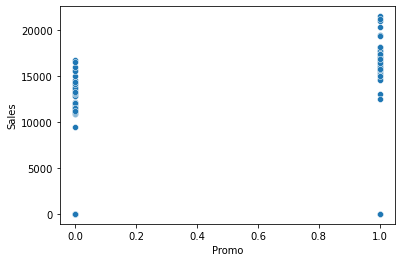

In [57]:
#After the dataframe is generated, we can make the scatter plot. 
sns.scatterplot(x=Store380_Scatter['Promo'], y=Store380_Scatter['Sales'])

#### By using the scatter plot, we can clearly see that sales number with promo applied is definitely higher than sales number without promo applied. Therefore, I can say that the application of promo can stimulate sales very well. 

### Part 2 Distribution of Sales in 7 months

#### In this part, I will make a histogram which includes distribution of store sales in 7 months

In [58]:
data_StoreDateSales

,Sales
Store,
1,792306
2,879262
3,1207047
4,1731851
5,816125
...,...
1111,858869
1112,1614029
1113,1164107


C:\Users\yanli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

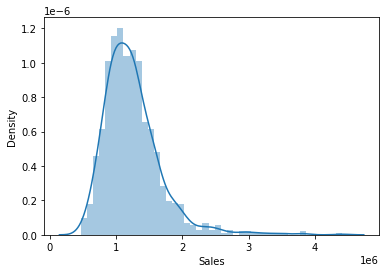

In [59]:
sns.distplot(a=data_StoreDateSales['Sales'], kde=True)

#### From the plot above, we can see that the most common number of sales in 7 months is aroung 1,200,000

### Part 3 Weekly sales of 7 months on 3 different store types.

#### In this part, I will use line-plot to show the trend of weekly sales of 7 months on 3 different store types.

In [60]:
#Take rows with store types: a, b, c, d respectively.
StoreType_a_map = data_7months['StoreType'].apply(lambda x: x == 'a')
StoreType_b_map = data_7months['StoreType'].apply(lambda x: x == 'b')
StoreType_c_map = data_7months['StoreType'].apply(lambda x: x == 'c')
StoreType_d_map = data_7months['StoreType'].apply(lambda x: x == 'd')

StoreType_a = data_7months[StoreType_a_map]
StoreType_b = data_7months[StoreType_b_map]
StoreType_c = data_7months[StoreType_c_map]
StoreType_d = data_7months[StoreType_d_map]

#Get total sales of everyday on each type of stores
StoreType_a_Sum = StoreType_a.groupby('Date').sum()
StoreType_b_Sum = StoreType_b.groupby('Date').sum()
StoreType_c_Sum = StoreType_c.groupby('Date').sum()
StoreType_d_Sum = StoreType_d.groupby('Date').sum()

StoreType_a_Sum_Sales = StoreType_a_Sum.reset_index().Sales
StoreType_b_Sum_Sales = StoreType_b_Sum.reset_index().Sales
StoreType_c_Sum_Sales = StoreType_c_Sum.reset_index().Sales
StoreType_d_Sum_Sales = StoreType_d_Sum.reset_index().Sales

#Generate weekly sales on each type of stores
StoreType_a_WklySale = StoreType_a_Sum_Sales.groupby(StoreType_a_Sum_Sales.index // 7).sum()
StoreType_b_WklySale = StoreType_b_Sum_Sales.groupby(StoreType_b_Sum_Sales.index // 7).sum()
StoreType_c_WklySale = StoreType_c_Sum_Sales.groupby(StoreType_c_Sum_Sales.index // 7).sum()
StoreType_d_WklySale = StoreType_d_Sum_Sales.groupby(StoreType_d_Sum_Sales.index // 7).sum()

StoreType_a_WklySale = StoreType_a_WklySale.reset_index(drop=True)
StoreType_b_WklySale = StoreType_b_WklySale.reset_index(drop=True)
StoreType_c_WklySale = StoreType_c_WklySale.reset_index(drop=True)
StoreType_d_WklySale = StoreType_d_WklySale.reset_index(drop=True)

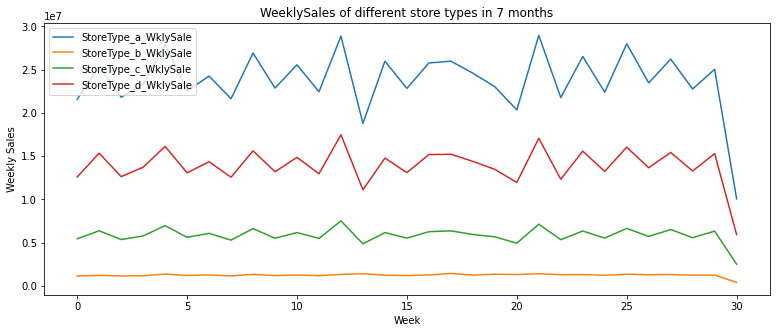

In [61]:
plt.figure(figsize = (13,5))

plt.plot(StoreType_a_WklySale)
plt.plot(StoreType_b_WklySale)
plt.plot(StoreType_c_WklySale)
plt.plot(StoreType_d_WklySale)

plt.legend(['StoreType_a_WklySale','StoreType_b_WklySale', 'StoreType_c_WklySale', 'StoreType_d_WklySale'])
plt.title('WeeklySales of different store types in 7 months')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

#### From the line-plot above, we can see that type 'a' stores has the largest culmulative sales in 7 months. 

## **Section 8: Train Test Split and Modelling (Q8)**

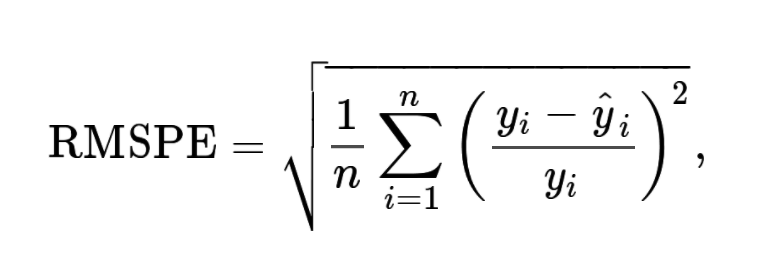

In [66]:
import time

#Before spliting data and importing them into model, I will do some pre-processing
#Remove all rows with Sales equal to 0
data_train_SaleNo0 = data_train[data_train.Sales.apply(lambda x:x != 0)]
data_train_SaleNo0['Date'] = data_train_SaleNo0['Date'].str.replace("-", "").astype(int)

#Now it's time to split the dataset
set_validation_map = data_train_SaleNo0.Date >= 20150501
set_traning_map = data_train_SaleNo0.Date <= 20150501

set_validation = data_train_SaleNo0[set_validation_map]
set_training = data_train_SaleNo0[set_traning_map]

<ipython-input-66-e00db76cf155>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_SaleNo0['Date'] = data_train_SaleNo0['Date'].str.replace("-", "").astype(int)


#### Since I have done data pre-processing and spliting, now it's time to jump into models.

### Model-1

#### First Try

In [70]:
M1_X1_train1 = pd.DataFrame(set_training, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo'])
M1_y1_train1 = np.array(set_training.Sales)
M1_X1_test1 = pd.DataFrame(set_validation, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo'])
M1_y1_test1 = np.array(set_validation.Sales)

In [75]:
LM_model = LinearRegression()
time_start1 = time.time()
LM_model.fit(M1_X1_train1, M1_y1_train1)
time_stop1 = time.time()
y_prediction1 = LM_model.predict(M1_X1_test1)
RMSPE1 = (np.sqrt(np.mean(np.square(M1_y1_test1 - y_prediction1)/ M1_y1_test1)))
TimeUsed1 = time_stop1 - time_start1

In [78]:
RMSPE1

18.194929979852976

In [79]:
TimeUsed1

0.07729887962341309

#### Second Try

In [74]:
M1_X1_train2 = pd.DataFrame(set_training, columns = ['Store','Date', 'Customers', 'Open', 'Promo'])
M1_y1_train2 = np.array(set_training.Sales)
M1_X1_test2 = pd.DataFrame(set_validation, columns = ['Store','Date', 'Customers', 'Open', 'Promo'])
M1_y1_test2 = np.array(set_validation.Sales)

In [83]:
time_start2 = time.time()
LM_model.fit(M1_X1_train2, M1_y1_train2)
time_stop2 = time.time()
y_prediction2 = LM_model.predict(M1_X1_test2)
RMSPE2 = (np.sqrt(np.mean(np.square(M1_y1_test2 - y_prediction2)/ M1_y1_test2)))
TimeUsed2 = time_stop2 - time_start2

In [84]:
RMSPE2

18.299545380350256

In [85]:
TimeUsed2

0.06933808326721191

#### Third Try

In [86]:
M1_X1_train3 = pd.DataFrame(set_training, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo','SchoolHoliday'])
M1_y1_train3 = np.array(set_training.Sales)
M1_X1_test3 = pd.DataFrame(set_validation, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo','SchoolHoliday'])
M1_y1_test3 = np.array(set_validation.Sales)

In [87]:
time_start3 = time.time()
LM_model.fit(M1_X1_train3, M1_y1_train3)
time_stop3 = time.time()
y_prediction3 = LM_model.predict(M1_X1_test3)
RMSPE3 = (np.sqrt(np.mean(np.square(M1_y1_test3 - y_prediction3)/ M1_y1_test3)))
TimeUsed3 = time_stop3 - time_start3

In [88]:
RMSPE3

18.202717572258578

In [105]:
TimeUsed3

0.09381103515625

### Model-2

#### First Try

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [93]:
M2_X1_train1 = pd.DataFrame(set_training, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo'])
M2_y1_train1 = np.array(set_training.Sales)
M2_X1_test1 = pd.DataFrame(set_validation, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo'])
M2_y1_test1 = np.array(set_validation.Sales)

In [94]:
RF = RandomForestRegressor()
M2_time_start1 = time.time()
RF.fit(M2_X1_train1, M2_y1_train1)
M2_time_stop1 = time.time()
M2_y_prediction1 = RF.predict(M2_X1_test1)
M2_RMSPE1 = (np.sqrt(np.mean(np.square(M2_y1_test1 - M2_y_prediction1)/ M2_y1_test1)))
M2_TimeUsed = M2_time_stop1 - M2_time_start1

In [95]:
M2_RMSPE1

13.141015970694918

In [96]:
M2_TimeUsed

170.99460530281067

#### Second Try

In [97]:
M2_X1_train2 = pd.DataFrame(set_training, columns = ['Store','Date', 'Customers', 'Open', 'Promo'])
M2_y1_train2 = np.array(set_training.Sales)
M2_X1_test2 = pd.DataFrame(set_validation, columns = ['Store','Date', 'Customers', 'Open', 'Promo'])
M2_y1_test2 = np.array(set_validation.Sales)

In [98]:
M2_time_start2 = time.time()
RF.fit(M2_X1_train2, M2_y1_train2)
M2_time_stop2 = time.time()
M2_y_prediction2 = RF.predict(M2_X1_test2)
M2_RMSPE2 = (np.sqrt(np.mean(np.square(M2_y1_test2 - M2_y_prediction2)/ M2_y1_test2)))
M2_TimeUsed2 = M2_time_stop2 - M2_time_start2

In [99]:
M2_RMSPE2

13.558727280430874

In [100]:
M2_TimeUsed2

158.75027012825012

#### Third Try

In [101]:
M2_X1_train3 = pd.DataFrame(set_training, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo','SchoolHoliday'])
M2_y1_train3 = np.array(set_training.Sales)
M2_X1_test3 = pd.DataFrame(set_validation, columns = ['Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo','SchoolHoliday'])
M2_y1_test3 = np.array(set_validation.Sales)

In [102]:
M2_time_start3 = time.time()
RF.fit(M2_X1_train3, M2_y1_train3)
M2_time_stop3 = time.time()
M2_y_prediction3 = RF.predict(M2_X1_test3)
M2_RMSPE3 = (np.sqrt(np.mean(np.square(M2_y1_test3 - M2_y_prediction3)/ M2_y1_test3)))
M2_TimeUsed3 = M2_time_stop3 - M2_time_start3

In [103]:
M2_RMSPE3

13.0937730513933

In [104]:
M2_TimeUsed3

182.3877453804016

#### The calculate time of Linear Regression Model is way faster than the Random Forest Regression Model; However, the accuracy of Linear Regression Model is less accurate than the Random Forest Regression Model. 
#### For thr hyperparameters of my models, I find out that this set: 'Store','DayOfWeek','Date', 'Customers', 'Open', 'Promo','SchoolHoliday' has the best accuracy performance in both regression models. 

## **Section 9: t-test (Q9)**

#### Since the third try of both regression models is the best, I will use the third y-prediction as my sample. 

#### Model-1

In [109]:
Q9_result = stats.ttest_ind(y_prediction3, M2_y_prediction3)
Q9_result

Ttest_indResult(statistic=-12.653392137929226, pvalue=1.1133833919510526e-36)

In [141]:
print(len(y_prediction3))

84490


#### We can see that the p-value is really small; Therefore, it's clear that these two predictions are not significantly different.

## **Section 10: Screenshots (Q10)** 

### Model-1

In [182]:
Q10_validation = data_test
Q10_training = data_train
#Q10_training['Date'] = data_train['Date'].str.replace("-", "").astype(int)
Q10_training = Q10_training[Q10_training.Sales.apply(lambda x:x != 0)]

In [183]:
Q10_M1_X1_train3 = pd.DataFrame(Q10_training, columns = ['Store','DayOfWeek','Date','Promo','SchoolHoliday'])
Q10_M1_y1_train3 = np.array(Q10_training.Sales)
Q10_M1_X1_test3 = pd.DataFrame(Q10_validation, columns = ['Store','DayOfWeek','Date','Promo','SchoolHoliday'])

In [184]:
Q10_time_start3 = time.time()
LM_model.fit(Q10_M1_X1_train3, Q10_M1_y1_train3)
Q10_time_stop3 = time.time()
Q10_y_prediction3 = LM_model.predict(Q10_M1_X1_test3)

In [191]:
d = {'Sales': Q10_y_prediction3}
df_M1 = pd.DataFrame(data=d)
data_sample.Sales = df_M1.Sales
data_sample.to_csv("C:/Users/yanli/OneDrive/桌面/sample_submission_Model1.csv", index=False)

Public Score & Highest Rank: 0.46327

Private Score & Highest Rank: 0.47644

Kaggle profile link: https://www.kaggle.com/yanlinxiang

Screenshot(s): =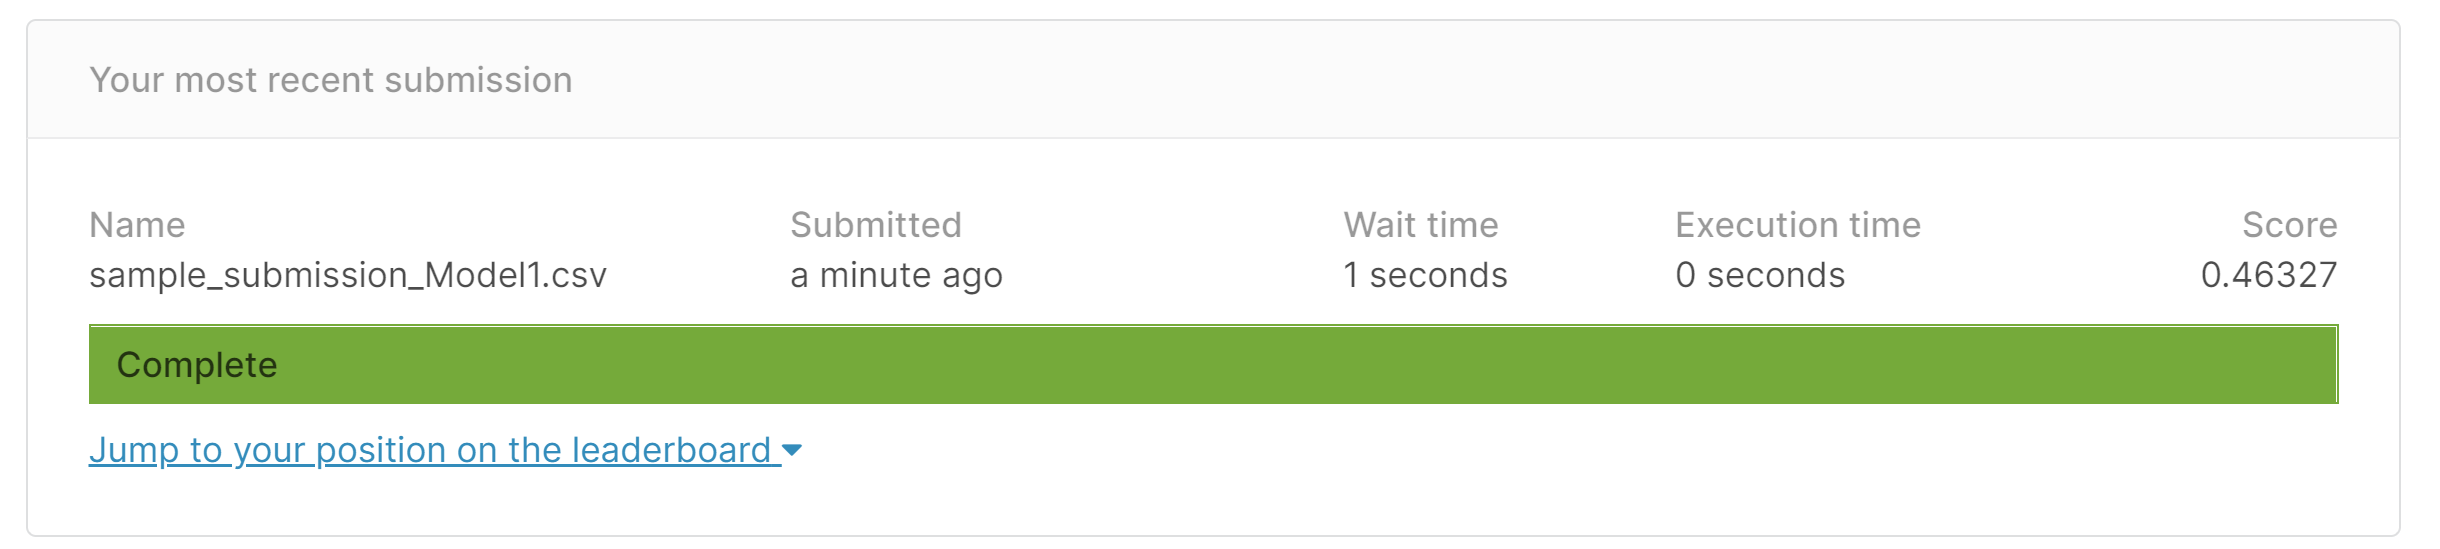

### Model-2

In [193]:
QM2_X1_train3 = pd.DataFrame(Q10_training, columns = ['Store','DayOfWeek','Date', 'Promo','SchoolHoliday'])
QM2_y1_train3 = np.array(Q10_training.Sales)
QM2_X1_test3 = pd.DataFrame(Q10_validation, columns = ['Store','DayOfWeek','Date', 'Promo','SchoolHoliday'])

In [194]:
QM2_time_start3 = time.time()
RF.fit(QM2_X1_train3, QM2_y1_train3)
QM2_time_stop3 = time.time()
QM2_y_prediction3 = RF.predict(QM2_X1_test3)

In [195]:
d1 = {'Sales': QM2_y_prediction3}
df_M2 = pd.DataFrame(data=d1)
data_sample.Sales = df_M2.Sales
data_sample.to_csv("C:/Users/yanli/OneDrive/桌面/sample_submission_Model2.csv", index=False)

Public Score & Highest Rank: 0.28150

Private Score & Highest Rank: 0.31531

Kaggle profile link: https://www.kaggle.com/yanlinxiang

Screenshot(s): 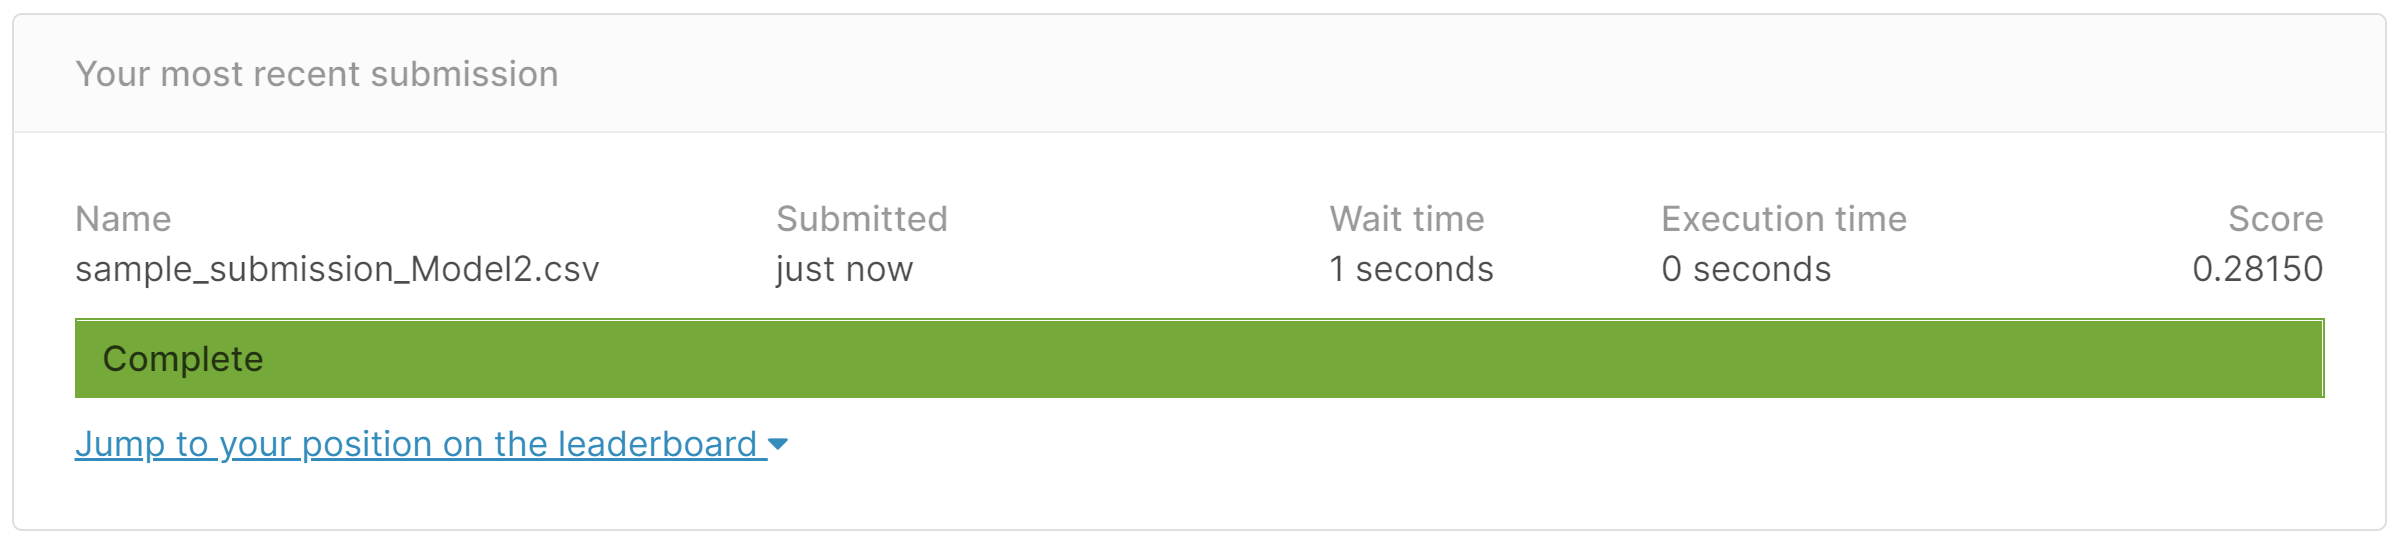